# pandasとMatplotlibによる可視化

## 使用データ
※事前に、 `05-evaluation/05-01-data.ipynb` のコードをすべてを実行して、生成される `05-evaluation/data/penguins.parquet` を `appendix/data/penguins.parquet` にコピーしてください。

In [1]:
%%bash
mkdir -p ./data && cp ../05-evaluation/data/penguins.parquet ./data/.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_parquet("data/penguins.parquet")
df.head()

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

## 散布図

### pandasによる可視化

In [3]:
df.plot(
    x="Culmen_Length",
    y="Flipper_Length",
    kind="scatter",
    c="Species_short",
    colormap="Dark2",
);

NameError: name 'df' is not defined

In [4]:
# 種ごとに点の色と形（マーカー）を設定する準備
codes = df.loc[:, "Species_short"].cat.codes  # 後で使う
cm = plt.get_cmap("Dark2")
markers = [".", "s", "^"]  # ●、■、▲

# 種ごとにグループ化
df_grouped = df.groupby("Species_short")

NameError: name 'df' is not defined

NameError: name 'df_grouped' is not defined

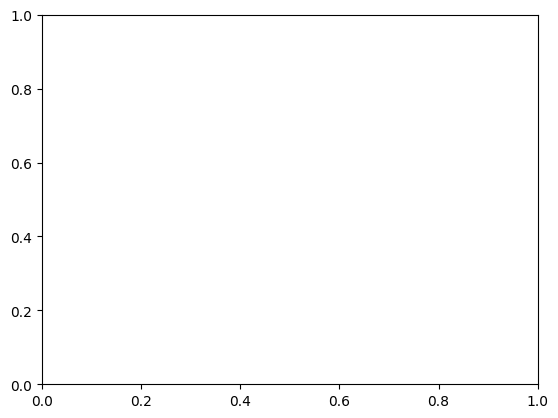

In [5]:
_, ax_scatter_pandas = plt.subplots()
for i, v in enumerate(df_grouped):
    label, group = v
    group.plot(
        x="Culmen_Length",
        y="Flipper_Length",
        kind="scatter",
        color=cm(i),
        marker=markers[i],
        label=label,
        ax=ax_scatter_pandas,  # 重ね打ち
    )

### Matplotlibによる可視化

NameError: name 'df_grouped' is not defined

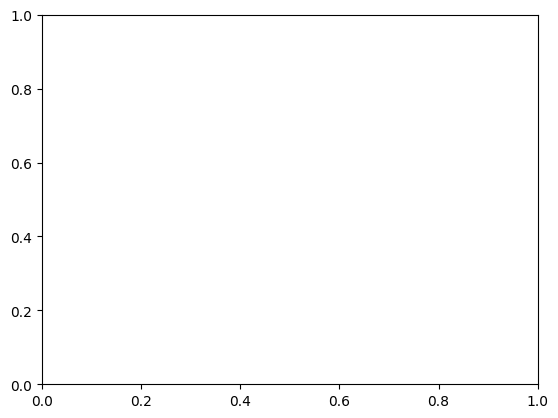

In [6]:
_, ax_scatter_matplotlib = plt.subplots()
for i, v in enumerate(df_grouped):
    label, group = v
    ax_scatter_matplotlib.scatter(
        x=group["Culmen_Length"],
        y=group["Flipper_Length"],
        color=cm(i),
        marker=markers[i],
        label=label,
    )
ax_scatter_matplotlib.legend()  # 凡例を表示
plt.show()

## 折れ線グラフ

### 調査年と種ごとの平均体重の計算

In [7]:
df_avg_weight_year = (
    df.assign(
        year=df.loc[:, "Date_Egg"].dt.to_period("Y")
    )  # pandasのPeriodオブジェクト（周期の単位：年）
    .groupby(["Species_short", "year"], as_index=False)["Body_Mass"]
    .mean()
)
df_avg_weight_year

NameError: name 'df' is not defined

### pandasによる可視化

In [8]:
df_avg_weight_year_pivoted = df_avg_weight_year.pivot_table(
    index="year",
    columns="Species_short",
    values="Body_Mass",
)
df_avg_weight_year_pivoted

NameError: name 'df_avg_weight_year' is not defined

In [9]:
# 線の色とスタイル（種類）
species_colors = [cm(i) for i in np.unique(codes)]
linestyles = [
    ".-",  # ●と実線
    "s:",  # ■と点線（...）
    "^--",  # ▲と破線（---）
]

# 描画
df_avg_weight_year_pivoted.plot(
    kind="line",
    color=species_colors,
    style=linestyles,
    ylim=[0, None],  # 縦軸の最小値を0にする
);

NameError: name 'codes' is not defined

### Matplotlibによる可視化

In [10]:
# Species列でグループ化
df_avg_weight_year_grouped = df_avg_weight_year.assign(
    year=lambda x: x.loc[:, "year"].dt.to_timestamp()
).groupby("Species_short")

NameError: name 'df_avg_weight_year' is not defined

NameError: name 'df_avg_weight_year_grouped' is not defined

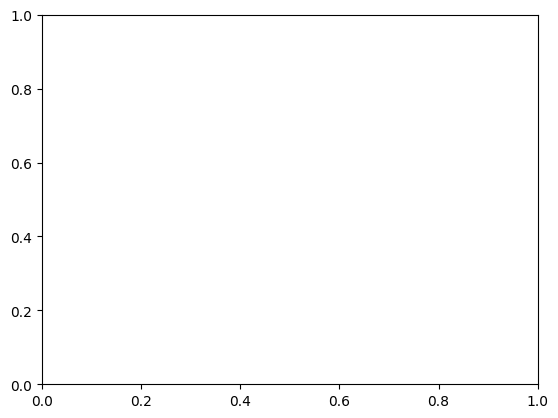

In [11]:
from matplotlib.dates import (
    DateFormatter,
    YearLocator,
)

# 種ごとにグラフを描き、重ね打ちする
_, ax_line_matplotlib = plt.subplots()
for (
    i,
    v,
) in enumerate(df_avg_weight_year_grouped):
    label, group = v
    ax_line_matplotlib.plot(
        group["year"],
        group["Body_Mass"],
        linestyles[i],
        color=cm(i),
        label=label,
    )
ax_line_matplotlib.set_ylim(0)  # 縦軸の最小値を0にする

# 横軸の目盛を調整
ax_line_matplotlib.xaxis.set_major_formatter(
    DateFormatter("%Y")
)  # 目盛に年だけを表示
ax_line_matplotlib.xaxis.set_major_locator(YearLocator())  # 目盛の間隔を1年に設定

ax_line_matplotlib.legend()
plt.show()

## 棒グラフ

### 島と種ごとの平均体重の計算

In [12]:
df_avg_weight_island = df.groupby(
    ["Species_short", "Island"], as_index=False
)["Body_Mass"].mean()
df_avg_weight_island

NameError: name 'df' is not defined

### pandasによる可視化

In [13]:
# 行方向に種、列方向に島となるように変形
df_avg_weight_island_pivoted = df_avg_weight_island.pivot_table(
    index="Species_short",
    columns="Island",
    values="Body_Mass",
)
df_avg_weight_island_pivoted

NameError: name 'df_avg_weight_island' is not defined

In [14]:
island_codes = df.loc[:, "Island"].cat.codes
island_colors = [cm(i) for i in np.unique(island_codes)]
hatches = ["/", "\\", "|"]

NameError: name 'df' is not defined

NameError: name 'df_avg_weight_island_pivoted' is not defined

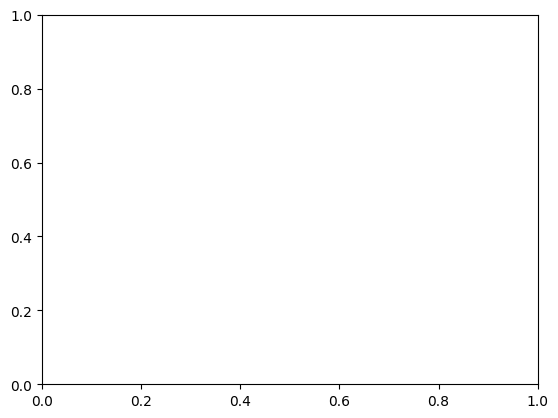

In [15]:
_, ax_bar_pandas = plt.subplots()
df_avg_weight_island_pivoted.plot(
    kind="bar",
    color=island_colors,
    rot=0,
    ax=ax_bar_pandas,
    legend=False,
)

# ハッチングの設定
bars = ax_bar_pandas.patches
hatch_list = [
    p for p in hatches for i in range(len(df_avg_weight_island_pivoted))
]
for bar, hatch in zip(bars, hatch_list):
    bar.set_hatch(hatch)

ax_bar_pandas.legend()
plt.show()

### Matplotlibによる可視化（参考）

In [16]:
# 島でグループ化
df_avg_weight_island_grouped = df_avg_weight_island.groupby("Island")

# 島ごとにグラフを描き、重ね打ちする
_, ax_bar_matplotlib = plt.subplots()
species_codes = np.unique(
    df_avg_weight_island.loc[:, "Species_short"].cat.codes.values
)  # それぞれの種の基準となる位置（座標）
n_species = df_avg_weight_island.loc[:, "Species_short"].nunique()  # 種の数
width = 1 / (n_species + 1)  # それぞれの島の棒の幅（種どうしで間隔を空けるために分母に1を足す）
for i, v in enumerate(df_avg_weight_island_grouped):
    label, group = v
    ax_bar_matplotlib.bar(
        x=species_codes + width * i,  # グループ（島）ごとに位置をずらす
        height=group["Body_Mass"],
        width=width,
        color=cm(i),
        hatch=hatches[i],
        label=label,
    )

# 横軸を調整
ax_bar_matplotlib.set_xlim(
    min(species_codes) - 3 * width, max(species_codes) + 3 * width
)
ax_bar_matplotlib.set_xticks(
    species_codes + width,
    df_avg_weight_island.loc[:, "Species_short"].cat.categories,
    rotation=0,
)

ax_bar_matplotlib.legend()
plt.show()

NameError: name 'df_avg_weight_island' is not defined

## ヒストグラム

NameError: name 'df_grouped' is not defined

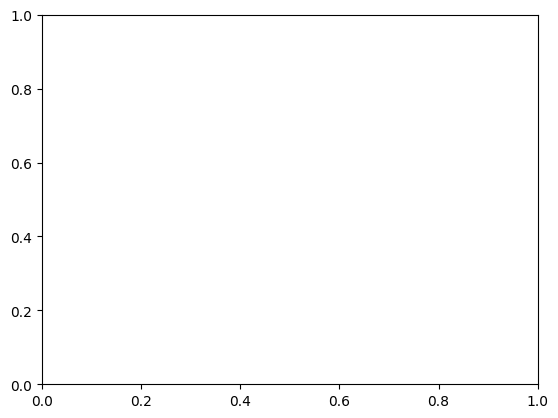

In [17]:
_, ax_hist_pandas_grouped = plt.subplots()
for i, v in enumerate(df_grouped):
    label, group = v
    group.plot(
        y="Body_Mass",
        kind="hist",
        color=cm(i),
        alpha=0.7,
        hatch=hatches[i],
        label=label,
        ax=ax_hist_pandas_grouped,
    )

ax_hist_pandas_grouped.legend()
plt.show()

In [18]:
df_hist_pivoted = df.pivot(columns="Species_short", values="Body_Mass")
df_hist_pivoted.head()

NameError: name 'df' is not defined

NameError: name 'df_hist_pivoted' is not defined

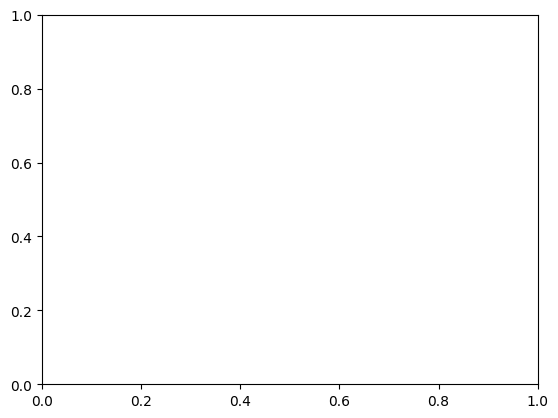

In [19]:
_, ax_hist_pandas_pivoted = plt.subplots()
df_hist_pivoted.plot(
    kind="hist",
    bins=10,
    color=species_colors,
    alpha=0.7,
    ax=ax_hist_pandas_pivoted,
    legend=False,
)

# ハッチングの設定
bars = ax_hist_pandas_pivoted.patches
hatch_list = [
    p for p in hatches for i in range(int(len(bars) / len(species_colors)))
]
for bar, hatch in zip(bars, hatch_list):
    bar.set_hatch(hatch)

ax_hist_pandas_pivoted.legend()
plt.show()

In [20]:
fig_hist_pandas_facets = df.plot(
    kind="hist",
    column="Body_Mass",
    by="Species_short",
    layout=(1, 3),
    legend=False,
)

# 各グループのサブプロット間の距離を調整
plt.subplots_adjust(wspace=0.6)

NameError: name 'df' is not defined

## 箱ひげ図

NameError: name 'df' is not defined

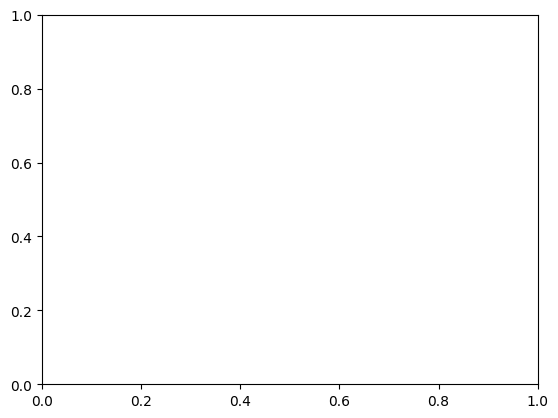

In [21]:
_, ax_box_pandas = plt.subplots()
df.plot(
    kind="box",
    column="Body_Mass",
    by="Species_short",
    rot=0,
    ax=ax_box_pandas,
)
plt.show()

## 文字化けへの対処
※事前に、IPA のフォントダウンロードページ [https://moji.or.jp/ipafont/ipafontdownload/](https://moji.or.jp/ipafont/ipafontdownload/) からIPAexゴシック(Ver.004.01)の `.zip` ファイルをダウンロードしてください。それを解凍して、 `ipaexg00401` フォルダごと `appendix/data/` 直下に配置します。

In [22]:
from matplotlib import font_manager

fonts_before = font_manager.fontManager.get_font_names()

In [23]:
print("IPAexGothic" in fonts_before)

False


In [24]:
from pathlib import Path

font_path = Path("data/ipaexg00401/ipaexg.ttf")
font_manager.fontManager.addfont(font_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ipaexg00401/ipaexg.ttf'

In [25]:
fonts_after = font_manager.fontManager.get_font_names()
print("IPAexGothic" in fonts_after)

False


In [26]:
import matplotlib as mpl

mpl.rc("font", family="IPAexGothic")

findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


/home/homata/workspace/musashiuniv/musashiuniv_manuscript/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/homata/workspace/musashiuniv/musashiuniv_manuscript/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/homata/workspace/musashiuniv/musashiuniv_manuscript/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/homata/workspace/musashiuniv/musashiuniv_manuscript/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.p

findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


findfont: Font family 'IPAexGothic' not found.


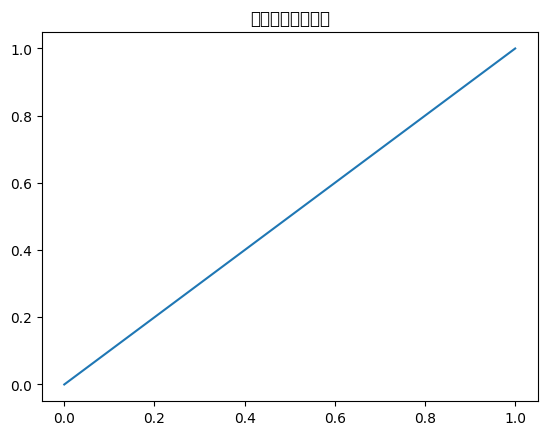

In [27]:
import matplotlib.pyplot as plt

plt.plot([0, 1])
plt.title("日本語のタイトル")
plt.show()

In [28]:
mpl.matplotlib_fname()

'/home/homata/workspace/musashiuniv/musashiuniv_manuscript/.venv/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc'